In [ ]:
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
 
class State(TypedDict): 
    messages: Annotated[list, add_messages]
      

groq_api = "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"

llm = ChatGroq(model="llama-3.1-8b-instant", api_key=groq_api)


In [2]:

GENERATE_POST = "generate_post"
GET_REVIEW_DECISION = "get_review_decision"
POST = "post"
COLLECT_FEEDBACK = "collect_feedback"

def generate_post(state: State): 
    return {
        "messages": [llm.invoke(state["messages"])]
    }


In [3]:

def get_review_decision(state: State):  
    post_content = state["messages"][-1].content 
    
    print("\n📢 Current LinkedIn Post:\n")
    print(post_content)
    print("\n")

    decision = input("Post to LinkedIn? (yes/no): ")

    if decision.lower() == "yes":
        return POST
    else:
        return COLLECT_FEEDBACK


In [4]:

def post(state: State):  
    final_post = state["messages"][-1].content  
    print("\n📢 Final LinkedIn Post:\n")
    print(final_post)
    print("\n✅ Post has been approved and is now live on LinkedIn!")

def collect_feedback(state: State):  
    feedback = input("How can I improve this post?")
    return {
        "messages": [HumanMessage(content=feedback)]
    }


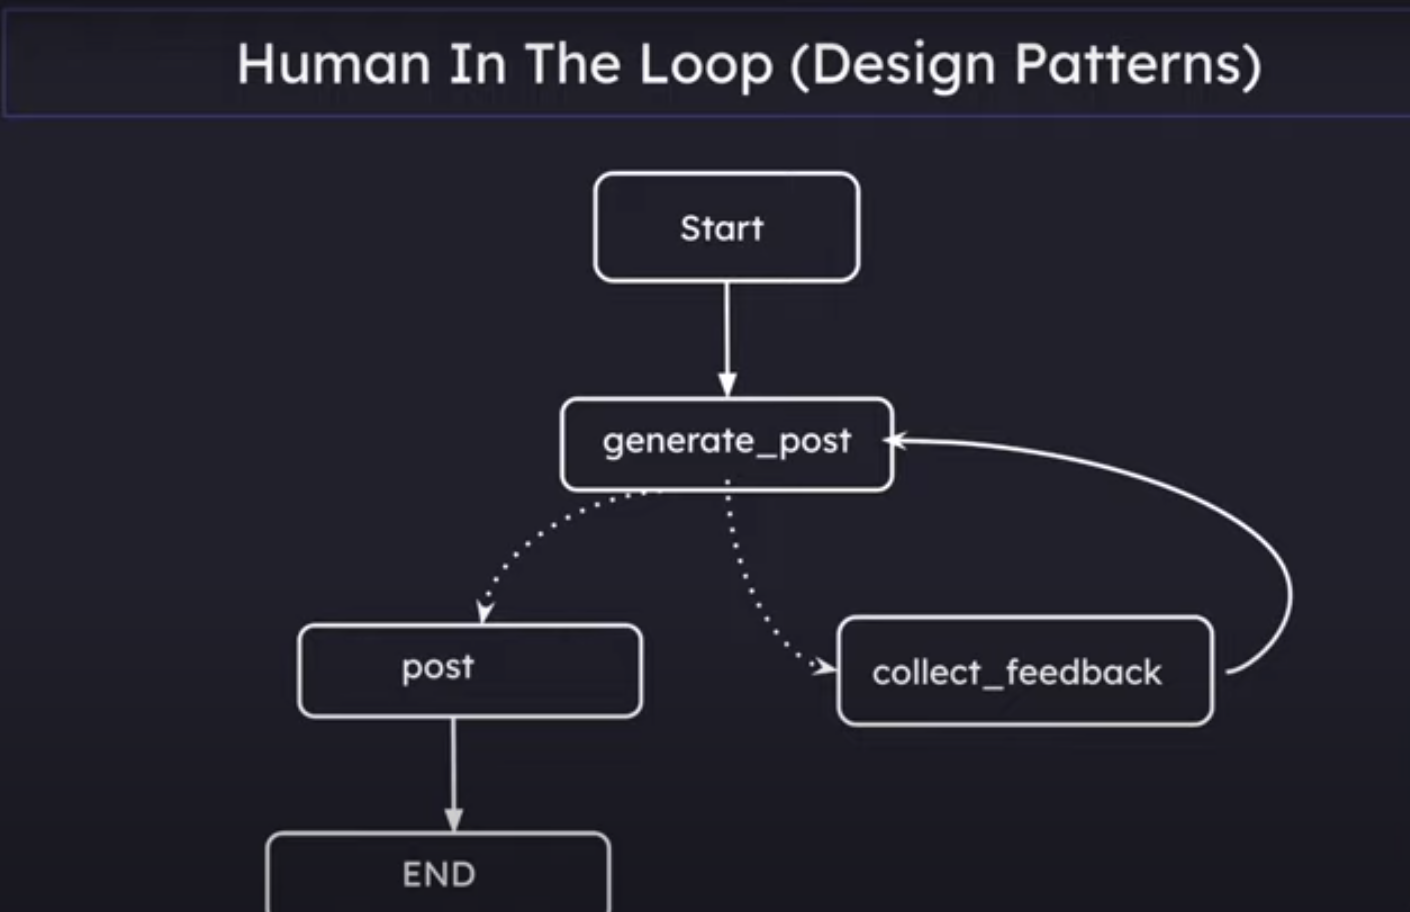

In [5]:

graph = StateGraph(State)

graph.add_node(GENERATE_POST, generate_post)
graph.add_node(GET_REVIEW_DECISION, get_review_decision)
graph.add_node(COLLECT_FEEDBACK, collect_feedback)
graph.add_node(POST, post)

graph.set_entry_point(GENERATE_POST)

graph.add_conditional_edges(GENERATE_POST, get_review_decision)
graph.add_edge(POST, END)
graph.add_edge(COLLECT_FEEDBACK, GENERATE_POST)

app = graph.compile()

In [6]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over content creation")]
})

print(response)


📢 Current LinkedIn Post:

**The Future of Content Creation: AI Agents on the Rise**

As we continue to evolve in the digital age, the landscape of content creation is undergoing a significant shift. Artificial Intelligence (AI) agents are increasingly taking center stage, revolutionizing the way we produce, consume, and interact with content.

**The Rise of AI-Generated Content**

With AI-powered tools, content creation is becoming faster, more efficient, and more cost-effective. AI agents can:

Produce high-quality content at scale, including articles, videos, social media posts, and more
Learn from data and adapt to changing trends and preferences
Analyze and optimize content for engagement and conversion

**The Implications for Humans**

While AI agents offer numerous benefits, they also raise important questions about the role of humans in content creation. Will AI-generated content replace human writers, journalists, and creatives? Or will it augment their abilities, freeing them